In [2]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [11]:
# 그림이 안나올 때 설정
%matplotlib inline

In [15]:
# title, label에 한글이 깨지지 않고 표시되도록 하는 설정
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [16]:
set(sorted([f.name for f in mpl.font_manager.fontManager.ttflist]))

{'Abyssinica SIL',
 'DejaVu Sans',
 'DejaVu Sans Display',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif Display',
 'FreeMono',
 'FreeSans',
 'FreeSerif',
 'Garuda',
 'KacstArt',
 'KacstBook',
 'KacstDecorative',
 'KacstDigital',
 'KacstFarsi',
 'KacstLetter',
 'KacstNaskh',
 'KacstOffice',
 'KacstOne',
 'KacstPen',
 'KacstPoster',
 'KacstQurn',
 'KacstScreen',
 'KacstTitle',
 'KacstTitleL',
 'Khmer OS',
 'Khmer OS System',
 'Kinnari',
 'LKLUG',
 'Laksaman',
 'Liberation Mono',
 'Liberation Sans',
 'Liberation Sans Narrow',
 'Liberation Serif',
 'Lohit Punjabi',
 'Loma',
 'NanumBarunGothic',
 'NanumGothic',
 'NanumGothicCoding',
 'NanumMyeongjo',
 'Norasi',
 'OpenSymbol',
 'Padauk',
 'Padauk Book',
 'Phetsarath OT',
 'Purisa',
 'STIX',
 'STIX Math',
 'STIXGeneral',
 'STIXIntegralsD',
 'STIXIntegralsSm',
 'STIXIntegralsUp',
 'STIXIntegralsUpD',
 'STIXIntegralsUpSm',
 'STIXNonUnicode',
 'STIXSizeFiveSym',
 'STIXSizeFourSym',
 'STIXSizeOneSym',
 'STIXSizeThreeSym',
 'STIXSizeTwoSym

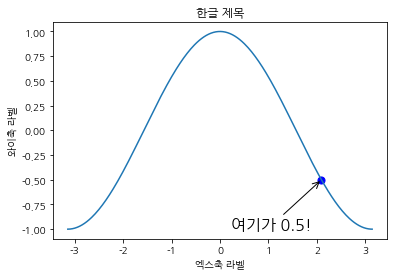

In [19]:
# 한글이 들어간 그래프 사례
X = np.linspace(-np.pi, np.pi, 256)
C = np.cos(X)
plt.title(u'한글 제목')
plt.plot(X, C, label=u"코사인")
t = 2 * np.pi / 3
plt.scatter(t, np.cos(t), 50, color='blue')
plt.xlabel(u"엑스축 라벨")
plt.ylabel(u"와이축 라벨")
plt.annotate(u"여기가 0.5!", xy=(t, np.cos(t)), xycoords='data', xytext=(-90, -50), 
             textcoords='offset points', fontsize=16, arrowprops=dict(arrowstyle="->"))
plt.show()  

# 2. 지도 학습 알고리즘

## 1) 예제에 사용할 DataSet
두 개의 특성을 가진 forge dataset은 인위적으로 만든 이진 분류 dataset입니다.  
다음 code는 이 dataset의 모든 data point를 scatter plot으로 그립니다.  
$x$ 축은 첫번째 특성이고 $y$ 축은 두 번째 특성입니다.

X.shape: (26, 2)


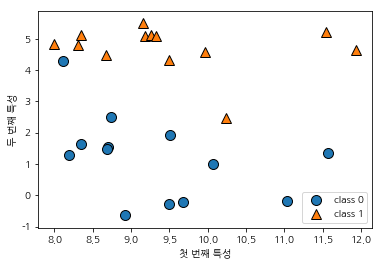

In [17]:
# dataset을 만듭니다.
X, y = mglearn.datasets.make_forge()

# scatter plot을 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1],  y)
plt.legend(["class 0", "class 1"], loc = 4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

X.shape 값에서 알 수 있듯이 이 dataset은 data point(관측치) 26개와 feature(특성 or 변수) 2개를 가집니다.  


regression(회귀) algorithm(알고리즘) 설명에는 인위적으로 만든 wave dataset을 사용하겠습니다.   
wave dataset은 입력 feature 하나와 modeling 할 target feature(또는 응답(response))를 가집니다.   
feature를 x축에 놓고 regression의 target(output(출력))을 y 축에 놓았습니다.

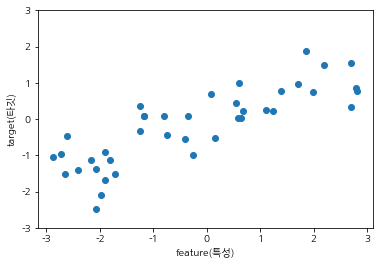

In [22]:
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("feature(특성)")
plt.ylabel("target(타깃)");

종이는 2차원이라 둘이 넘는 특성을 표현하기 어려우니 손쉽게 시각화하기 위해서 간단한 저차원 dataset을 사용하겠습니다.  
featrue가 적은 dataset(**저차원 dataset**)에서 얻은 직관이 feature가 많은 dataset(**고차원 dataset**)에서 그대로 유지되지 않을 수 있습니다.  
하지만 이런 사실을 유념해둔다면 algorithm을 배울 때 저차원 dataset을 사용하는 것이 매우 좋습니다.  


인위적인 소규모 dataset외에 scikit-learn에 들어 있는 실제 dataset도 두 개를 사용하겠습니다.  
하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) dataset입니다(줄여서 cancer라고 하겠습니다).  
각 종양은 양성(benign, 해롭지 않은 종양)과 악성(malignant, 암종양)으로 label되어 있고, 조직 data를 기반으로 종양이 악성인지 양성인지를 예측할 수 있도록 학습하는 것이 과제입니다.  
이 data는 scikit-learn에 있는 load_breast_cancer 함수를 사용하여 불러올 수 있습니다.

In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))

cancer.keys() : 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


이 dataset은 569개의 data point를 가지고 있고 feature는 30개입니다.

In [26]:
print("유방암 data의 형태 : {}".format(cancer.data.shape))

유방암 data의 형태 : (569, 30)


569개 data point 중 212개는 악성이고 357개는 양성입니다.

In [27]:
print("class별 sample 개수 : \n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

class별 sample 개수 : 
{'malignant': 212, 'benign': 357}


feature_name 속성을 확인하면 각 feature(특성)의 의미를 알 수 있습니다.

In [28]:
print("특성 이름 : \n{}".format(cancer.feature_names))

특성 이름 : 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
